In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/adult-census-income/adult.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


#Module for resampling
from sklearn.utils import resample

#for model creation
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#for decision tree classifcation
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


#for randomforest classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

#for knn classification
from sklearn.neighbors import KNeighborsClassifier

#for svm classification
from sklearn.svm import SVC
from sklearn import svm

#for mlp classification
from sklearn.neural_network import MLPClassifier


In [3]:

data=pd.read_csv('../input/adult-census-income/adult.csv')

In [4]:
data.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
#Removal of missing data specified by question mark(?)
#New dataframe df
df = data[(data != '?').all(axis=1)]

/opt/conda/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [7]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [8]:
df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
# Binary encoding of the target variable
df['income'] = df['income'].apply(lambda inc: 0 if inc == "<=50K" else 1) 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# One-hot encoding Implementation

In [10]:
#One-hot encoding of the categorical columns
#converting categorical data to binary
df = pd.get_dummies(df,columns=['workclass','sex', 'marital.status',
                                    'race','relationship','occupation'],
               prefix=['workclass', 'is', 'is', 'race_is', 'relation', 'is'], drop_first=True)

In [11]:
df.head()

,age,fnlwgt,education,education.num,capital.gain,capital.loss,hours.per.week,native.country,income,workclass_Local-gov,...,is_Farming-fishing,is_Handlers-cleaners,is_Machine-op-inspct,is_Other-service,is_Priv-house-serv,is_Prof-specialty,is_Protective-serv,is_Sales,is_Tech-support,is_Transport-moving
1,82,132870,HS-grad,9,0,4356,18,United-States,0,0,...,0,0,0,0,0,0,0,0,0,0
3,54,140359,7th-8th,4,0,3900,40,United-States,0,0,...,0,0,1,0,0,0,0,0,0,0
4,41,264663,Some-college,10,0,3900,40,United-States,0,0,...,0,0,0,0,0,1,0,0,0,0
5,34,216864,HS-grad,9,0,3770,45,United-States,0,0,...,0,0,0,1,0,0,0,0,0,0
6,38,150601,10th,6,0,3770,40,United-States,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
print(df['income'].value_counts())

0    22654
1     7508
Name: income, dtype: int64


# **Unbalanced data is seen in target class**

In [13]:
#Balancing data
# Separate majority and minority classes
df_majority = df[df.income==0]
df_minority = df[df.income==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=22654,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.income.value_counts()

1    22654
0    22654
Name: income, dtype: int64

In [14]:
df_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45308 entries, 1 to 18504
Data columns (total 44 columns):
age                           45308 non-null int64
fnlwgt                        45308 non-null int64
education                     45308 non-null object
education.num                 45308 non-null int64
capital.gain                  45308 non-null int64
capital.loss                  45308 non-null int64
hours.per.week                45308 non-null int64
native.country                45308 non-null object
income                        45308 non-null int64
workclass_Local-gov           45308 non-null uint8
workclass_Private             45308 non-null uint8
workclass_Self-emp-inc        45308 non-null uint8
workclass_Self-emp-not-inc    45308 non-null uint8
workclass_State-gov           45308 non-null uint8
workclass_Without-pay         45308 non-null uint8
is_Male                       45308 non-null uint8
is_Married-AF-spouse          45308 non-null uint8
is_Married-civ-spouse 

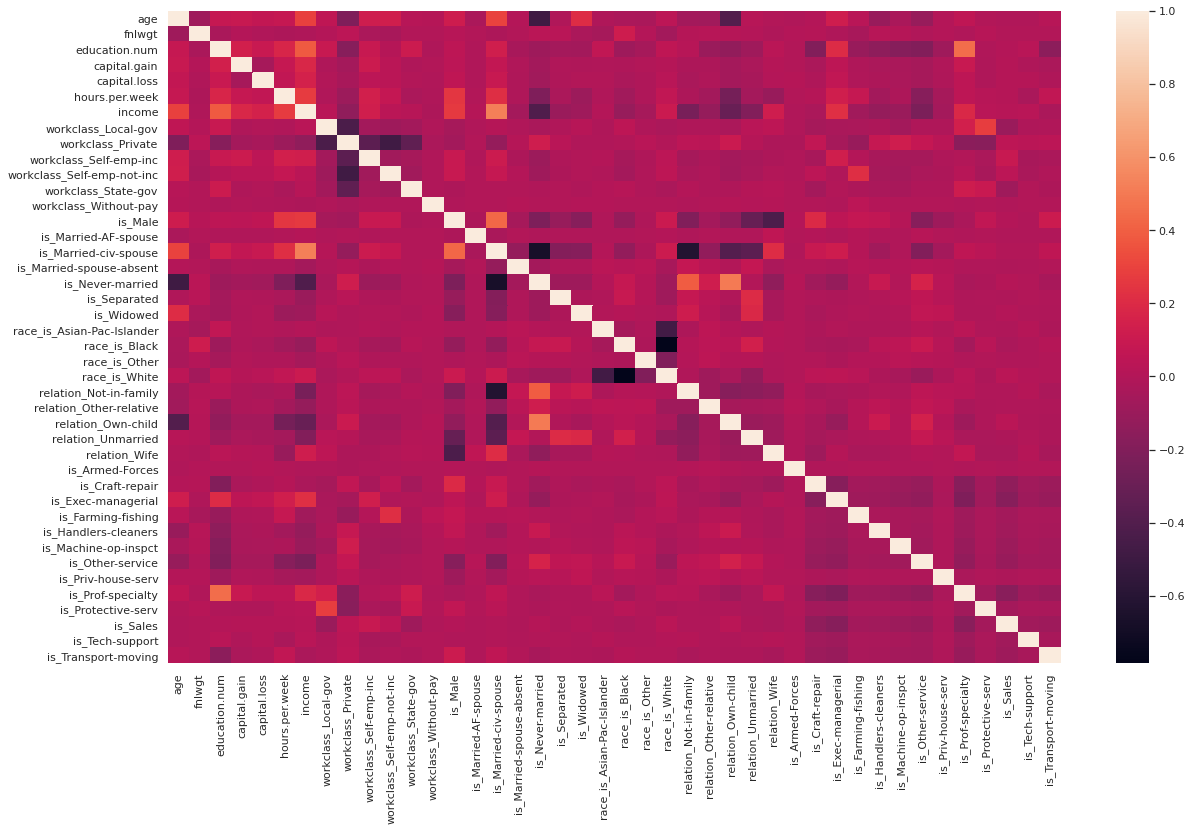

In [15]:
plt.figure(figsize=(20,12))
sns.heatmap(df_upsampled.corr())

In [16]:
#Splitting dataset into training and testing class
array = df_upsampled.values
X = array[:,0:8 and 9:44]
Y = array[:,8]
Y=Y.astype('int')

X_train,X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=1)

In [17]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy",max_depth=3)

clf = clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_validation)

cm = confusion_matrix(Y_pred, Y_validation)

print("Accuracy of Decision tree classification:",metrics.accuracy_score(Y_validation, Y_pred))
print(cm)

Accuracy of Decision tree classification: 0.6629883028029132
[[2448  971]
 [2083 3560]]


[Text(279.0, 475.65000000000003, 'X[0] <= 27.5\nentropy = 1.0\nsamples = 36246\nvalue = [18123, 18123]'),
 Text(139.5, 339.75, 'X[0] <= 23.5\nentropy = 0.467\nsamples = 6192\nvalue = [5576, 616]'),
 Text(69.75, 203.85000000000002, 'X[0] <= 20.5\nentropy = 0.171\nsamples = 3342\nvalue = [3257, 85]'),
 Text(34.875, 67.94999999999999, 'entropy = 0.014\nsamples = 1582\nvalue = [1580, 2]'),
 Text(104.625, 67.94999999999999, 'entropy = 0.274\nsamples = 1760\nvalue = [1677, 83]'),
 Text(209.25, 203.85000000000002, 'X[0] <= 24.5\nentropy = 0.694\nsamples = 2850\nvalue = [2319, 531]'),
 Text(174.375, 67.94999999999999, 'entropy = 0.459\nsamples = 660\nvalue = [596, 64]'),
 Text(244.125, 67.94999999999999, 'entropy = 0.748\nsamples = 2190\nvalue = [1723, 467]'),
 Text(418.5, 339.75, 'X[0] <= 35.5\nentropy = 0.98\nsamples = 30054\nvalue = [12547, 17507]'),
 Text(348.75, 203.85000000000002, 'X[0] <= 29.5\nentropy = 0.995\nsamples = 7475\nvalue = [4063, 3412]'),
 Text(313.875, 67.94999999999999, 'e

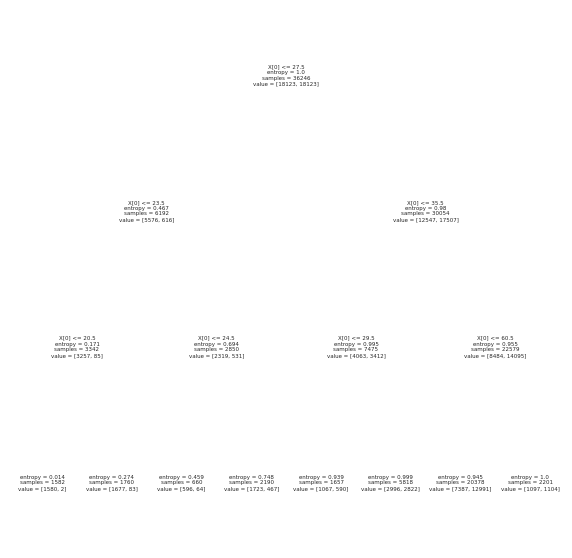

In [18]:
#decision tree
plt.figure(figsize=(10,10))
tree.plot_tree(clf)

In [19]:
#random forest classification
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf = clf.fit(X_train,Y_train)

Y_pred = clf.predict(X_validation)
cm = confusion_matrix(Y_pred, Y_validation)

print("Accuracy random froest classification:",metrics.accuracy_score(Y_validation, Y_pred))
print(cm)

Accuracy random froest classification: 0.6629883028029132
[[2448  971]
 [2083 3560]]


In [20]:
#knn clasification
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train,Y_train)

Y_pred = knn.predict(X_validation)
cm = confusion_matrix(Y_pred, Y_validation)

print("Accuracy of knn classification:",metrics.accuracy_score(Y_validation, Y_pred))
print(cm)

Accuracy of knn classification: 0.646987419995586
[[2750 1418]
 [1781 3113]]


In [23]:
#support vector machine Classification
clf = svm.SVC(kernel='linear') 

clf.fit(X_train, Y_train)


Y_pred = clf.predict(X_validation)
cm = confusion_matrix(Y_pred, Y_validation)


print("Accuracy of SVM Classifier : ",metrics.accuracy_score(Y_validation, Y_pred))
print(cm)



Accuracy of SVM Classifier :  0.6452218053409843
[[2769 1453]
 [1762 3078]]


In [22]:
#MultilayerPercetron classification

clf = MLPClassifier(hidden_layer_sizes=(3,3), max_iter=3000,activation = 'relu',solver='adam',random_state=1)
clf=clf.fit(X_train, Y_train)

cm = confusion_matrix(Y_pred, Y_validation)
Y_pred = clf.predict(X_validation)

print("Accuracy of MLPClassifier : ",metrics.accuracy_score(Y_validation, Y_pred))
print(cm)

Accuracy of MLPClassifier :  0.6404767159567425
[[2750 1418]
 [1781 3113]]
